# Исследование данных

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

## Загрузка и первичный анализ

In [452]:
filepath = "/Users/boris/ml_masters_new/semester 2/ml/term_paper/data/Данные_для_курсовои_Классическое_МО.xlsx"

In [453]:
df = pd.read_excel(filepath)

In [454]:
df.shape

(1001, 214)

In [455]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [456]:
df = df.drop(columns=["Unnamed: 0"])

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [458]:
df.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


Точно понадобится нормаллизация

### Проверка на пропуски и дубликаты

In [459]:
df.isnull().sum()

IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
MaxEStateIndex       0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 213, dtype: int64

Слишком много признаков. Выведем только те, в которых есть пропуски

In [460]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Колонки с пропусками:")
print(missing)

Колонки с пропусками:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


Данные признаки не подлежат заполнению ввиду ответственности задачи. Удалим строки, в которых они встречаются

In [461]:
df = df.dropna()
df.shape

(998, 213)

In [462]:
df.duplicated().sum()

32

In [463]:
df = df.drop_duplicates()

In [464]:
df.shape

(966, 213)

## Распределение целевых переменных

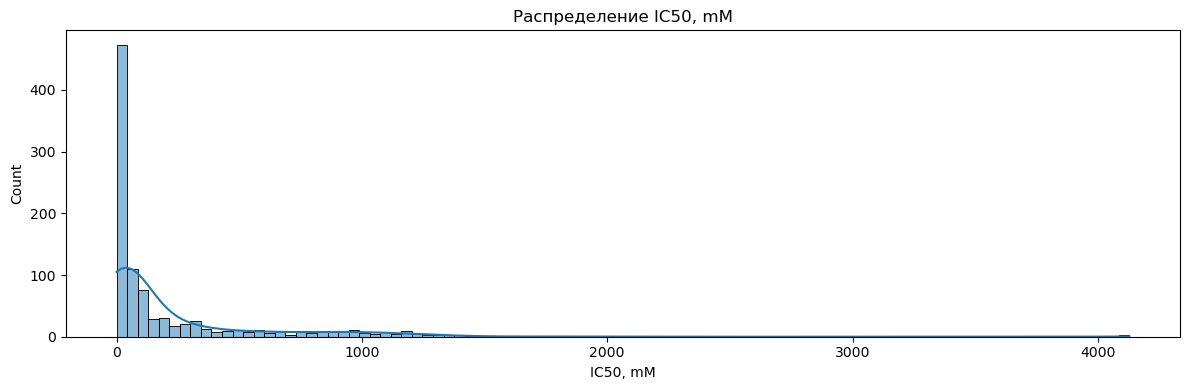

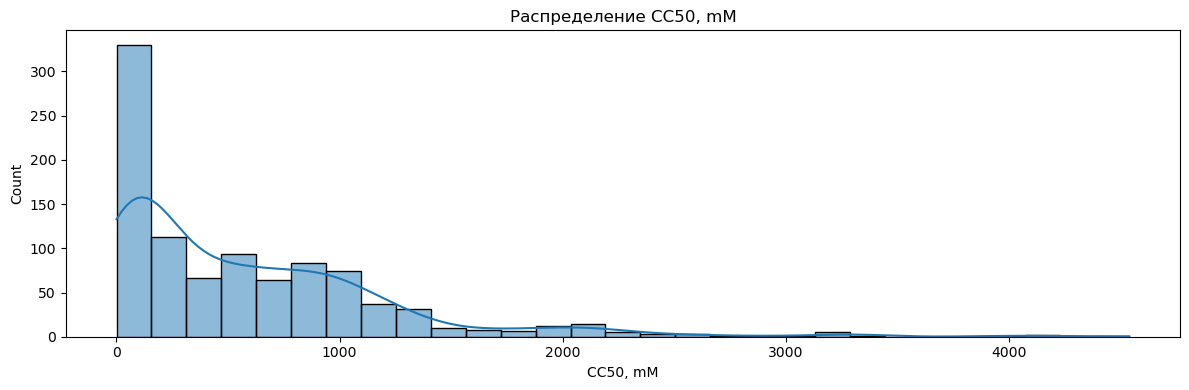

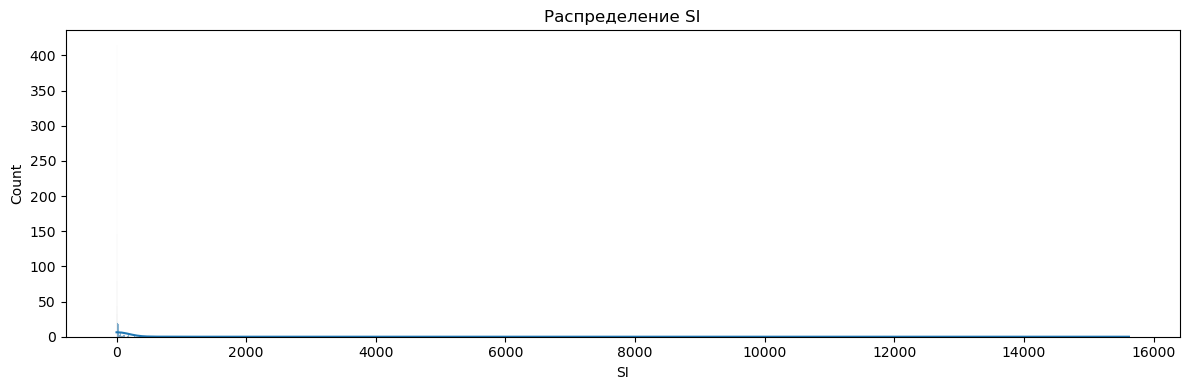

In [465]:
targets = ['IC50, mM', 'CC50, mM', 'SI']
for target in targets:
    plt.figure(figsize=(12, 4))
    sns.histplot(df[target], kde=True)
    plt.title(f'Распределение {target}')
    plt.tight_layout()
    plt.show

Распределение с большим левым хвостом. Похоже на логарифмическое. Попробуем прологарифмировать по основанию 10

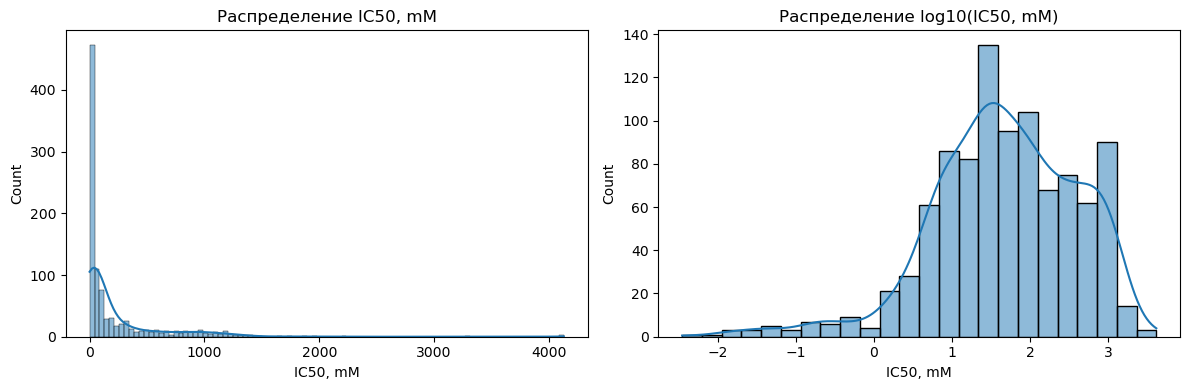

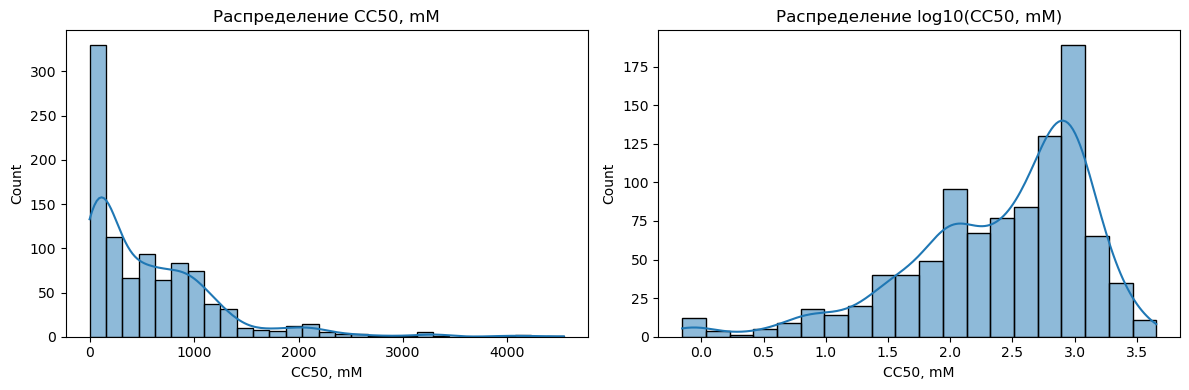

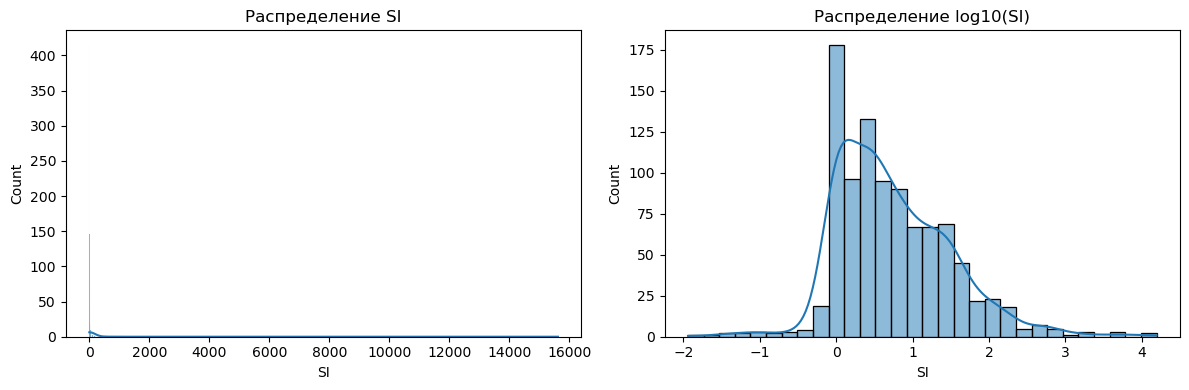

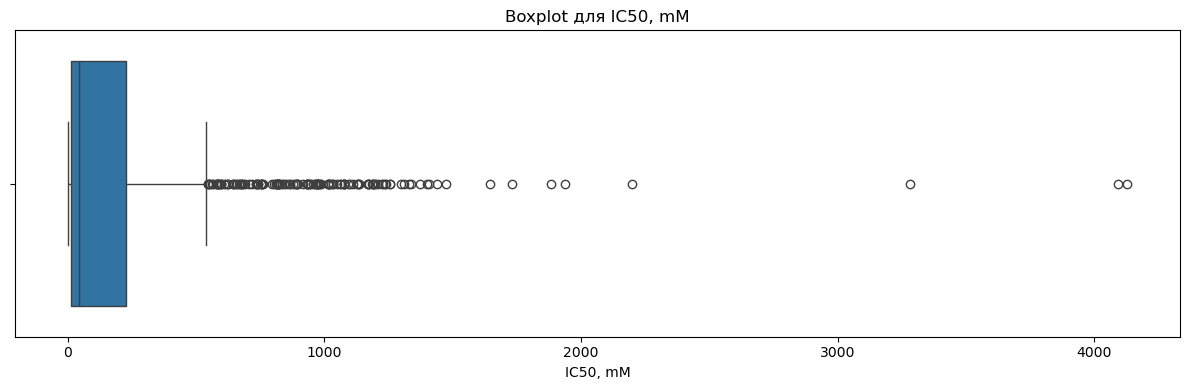

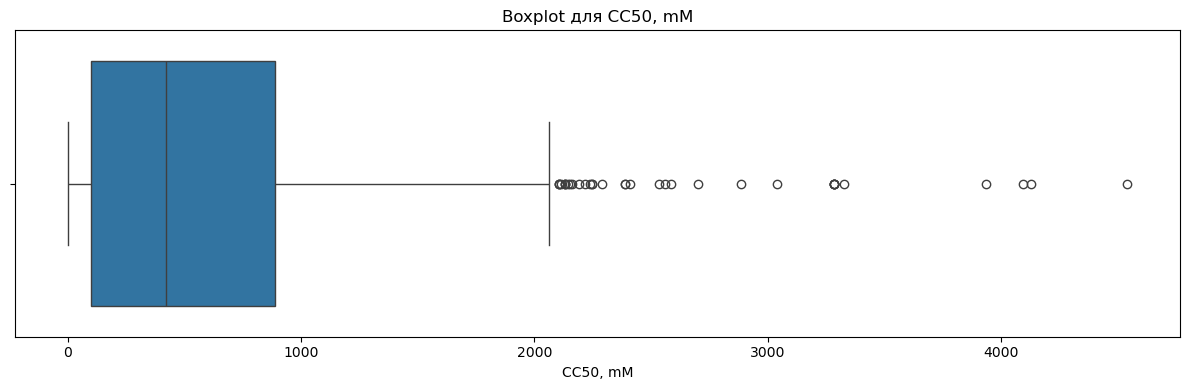

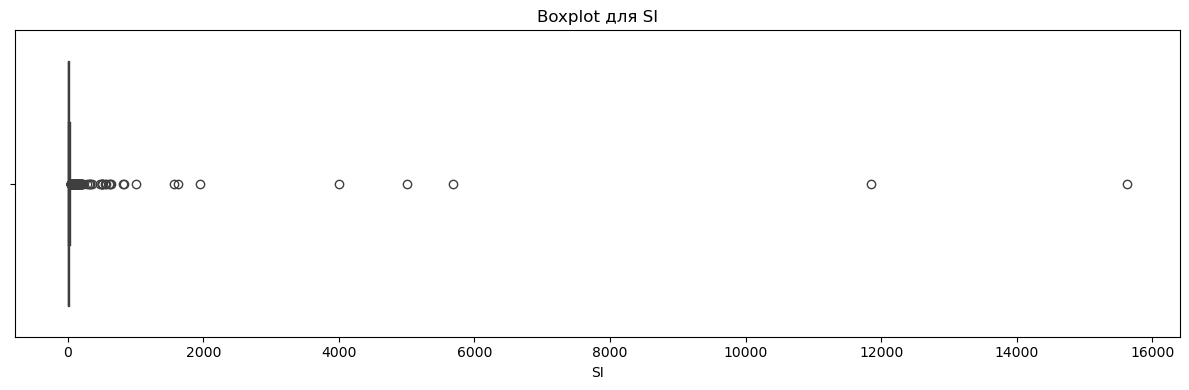

In [466]:
for target in targets:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[target], kde=True)
    plt.title(f'Распределение {target}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(np.log10(df[target]), kde=True)
    plt.title(f'Распределение log10({target})')
    
    plt.tight_layout()
    plt.show()
    
for target in targets:
    plt.figure(figsize=(12, 4))
    
    sns.boxplot(x=df[target])
    
    plt.title(f'Boxplot для {target}')
    plt.tight_layout()
    plt.show()
    

Выводы:
 1. Распределение с большим левым хвостом. Очень похоже на логарифмическое
 2. Логарифмизация улучшает распределение, приводя его ближе к нормальному. Будем использовать в блокноте обучения для регрессионных моделей
 3. Большое количество выбросов, что видно на боксплотах

## Корреляционный анализ

Посчитаем корреляцию между целевыми переменными

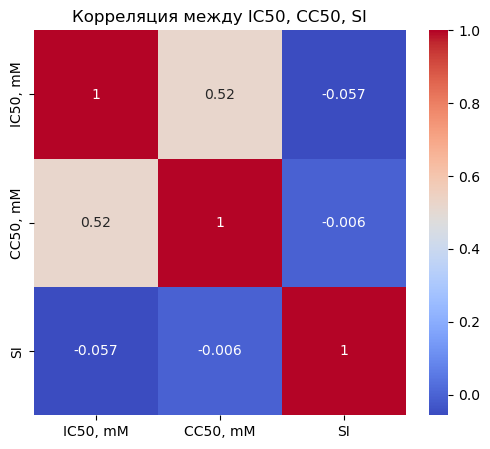

In [467]:
corr_matrix = df[targets].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляция между IC50, CC50, SI")
plt.show()

Посчитаем корреляции признаков с целевыми переменными

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


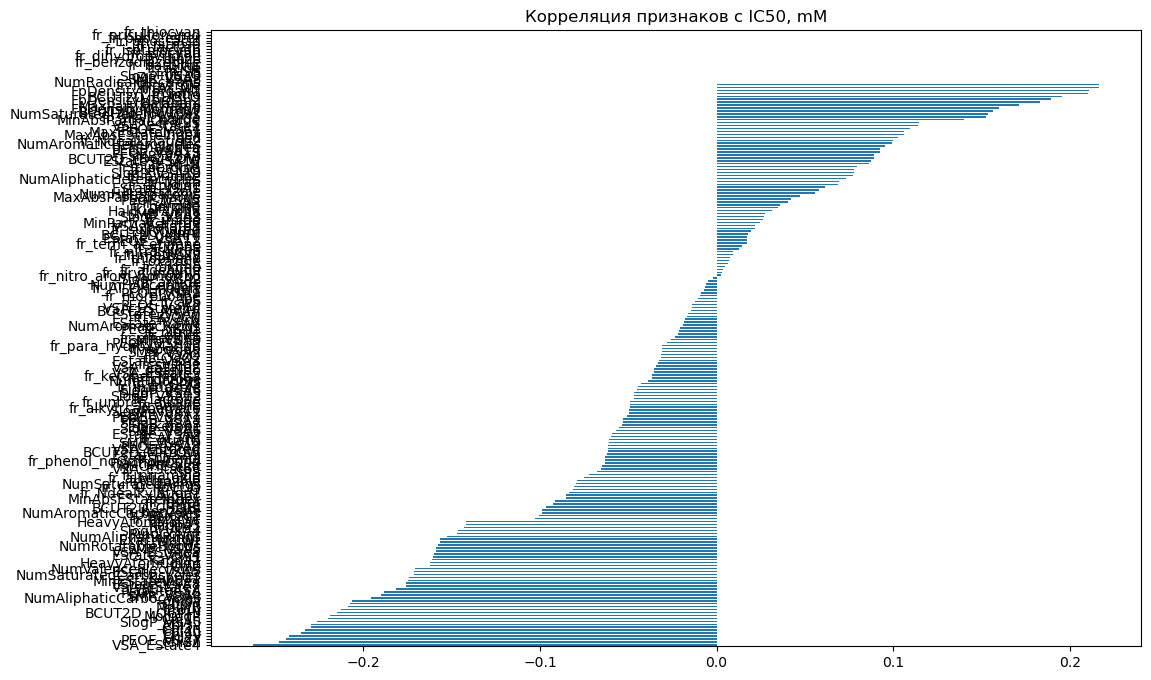

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


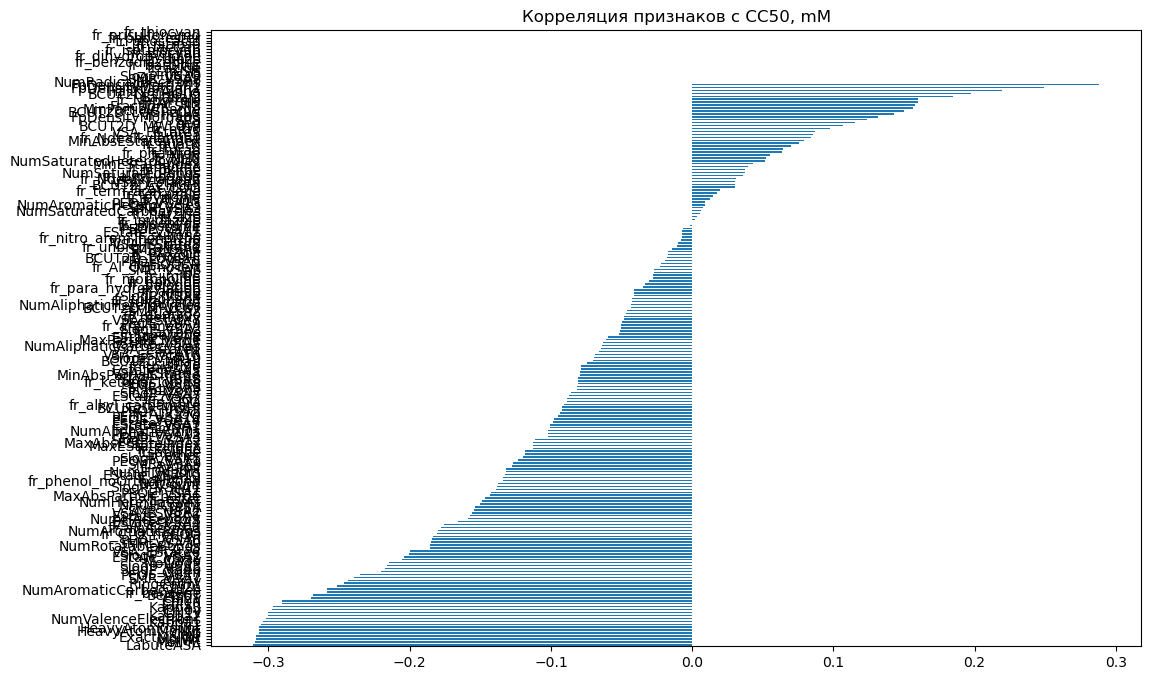

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


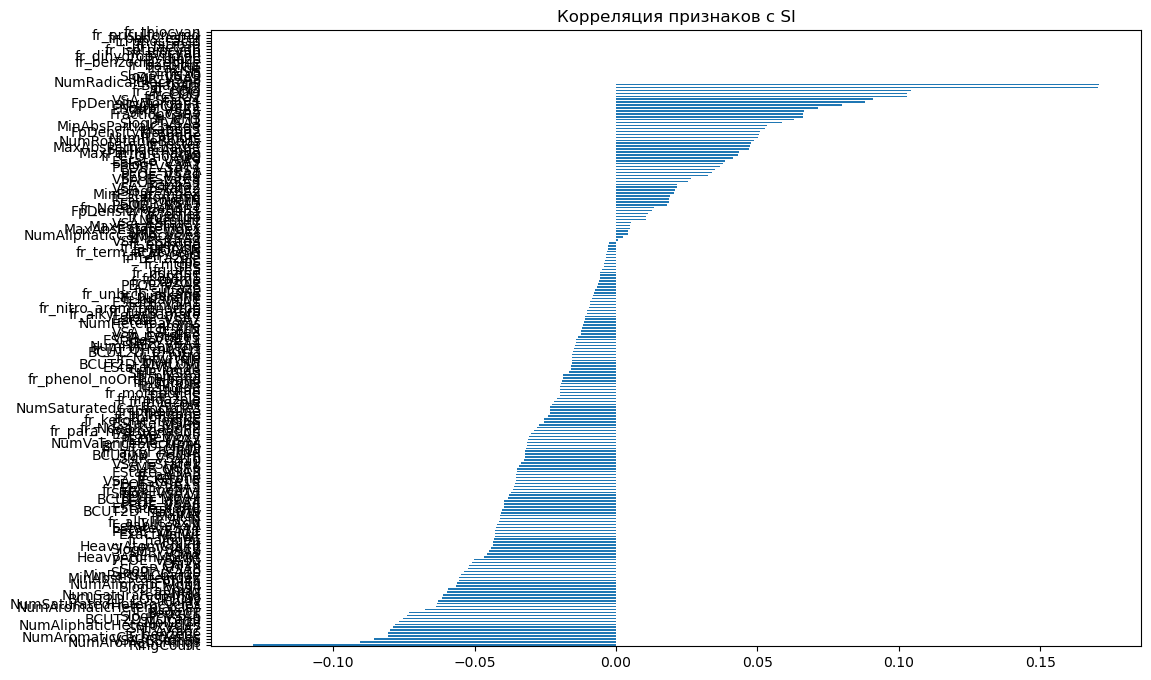

In [468]:
features = df.columns[3:]
for target in targets:
    plt.figure(figsize=(12, 8))
    correlations = df[features].corrwith(df[target])
    correlations.sort_values(inplace=True)
    correlations.plot(kind='barh', title=f'Корреляция признаков с {target}')
    plt.show()

In [469]:
threshold = 0.7

high_corr_features = {}
for target in targets:
    print(target)
    correlations = df.corr()[target].abs()
    high_corr = correlations[correlations > threshold].drop(target)
    high_corr_features[target] = high_corr.index.tolist()
    print(f"Признаки с корреляцией > {threshold} с {target}:")
    print(high_corr.sort_values(ascending=False))

IC50, mM
Признаки с корреляцией > 0.7 с IC50, mM:
Series([], Name: IC50, mM, dtype: float64)
CC50, mM
Признаки с корреляцией > 0.7 с CC50, mM:
Series([], Name: CC50, mM, dtype: float64)
SI
Признаки с корреляцией > 0.7 с SI:
Series([], Name: SI, dtype: float64)


Признаков, имеющих высокую корреляцию с таргетами, не найдено

In [470]:
irrelevant_features_set = set()
for target in targets:
    print(target)
    correlations = df.corr()[target].abs().sort_values(ascending=False)
    irrelevant_features = correlations[correlations < 0.01].index
    print(irrelevant_features)
    irrelevant_features_set.update(list(irrelevant_features))
    
print(irrelevant_features_set)
len(irrelevant_features_set)

IC50, mM
Index(['fr_nitro_arom', 'fr_morpholine', 'fr_methoxy', 'PEOE_VSA9',
       'fr_thiophene', 'fr_NH1', 'fr_Al_OH_noTert', 'fr_oxazole', 'TPSA',
       'NumHAcceptors', 'fr_oxime', 'fr_amide', 'fr_aldehyde',
       'fr_aryl_methyl', 'fr_nitro_arom_nonortho', 'SlogP_VSA2'],
      dtype='object')
CC50, mM
Index(['PEOE_VSA13', 'NumAromaticHeterocycles', 'fr_nitro_arom', 'SMR_VSA3',
       'fr_nitro_arom_nonortho', 'fr_sulfone', 'EState_VSA11', 'PEOE_VSA4',
       'NumSaturatedCarbocycles', 'SI', 'fr_hdrzine', 'fr_azo', 'fr_imidazole',
       'fr_piperdine', 'fr_aldehyde'],
      dtype='object')
SI
Index(['fr_nitro_arom_nonortho', 'fr_amidine', 'EState_VSA1', 'fr_priamide',
       'fr_piperzine', 'fr_unbrch_alkane', 'fr_sulfone', 'fr_azo', 'PEOE_VSA8',
       'fr_oxazole', 'CC50, mM', 'fr_oxime', 'Kappa1', 'fr_hdrzine',
       'VSA_EState7', 'fr_urea', 'MaxEStateIndex', 'MaxAbsEStateIndex', 'SPS',
       'SMR_VSA1', 'NumAliphaticCarbocycles', 'fr_nitrile', 'Ipc', 'fr_Ar_COO',
       

52

Найдено 47 признаков, имеющих корреляцию с одинм из таргетов < 0.01

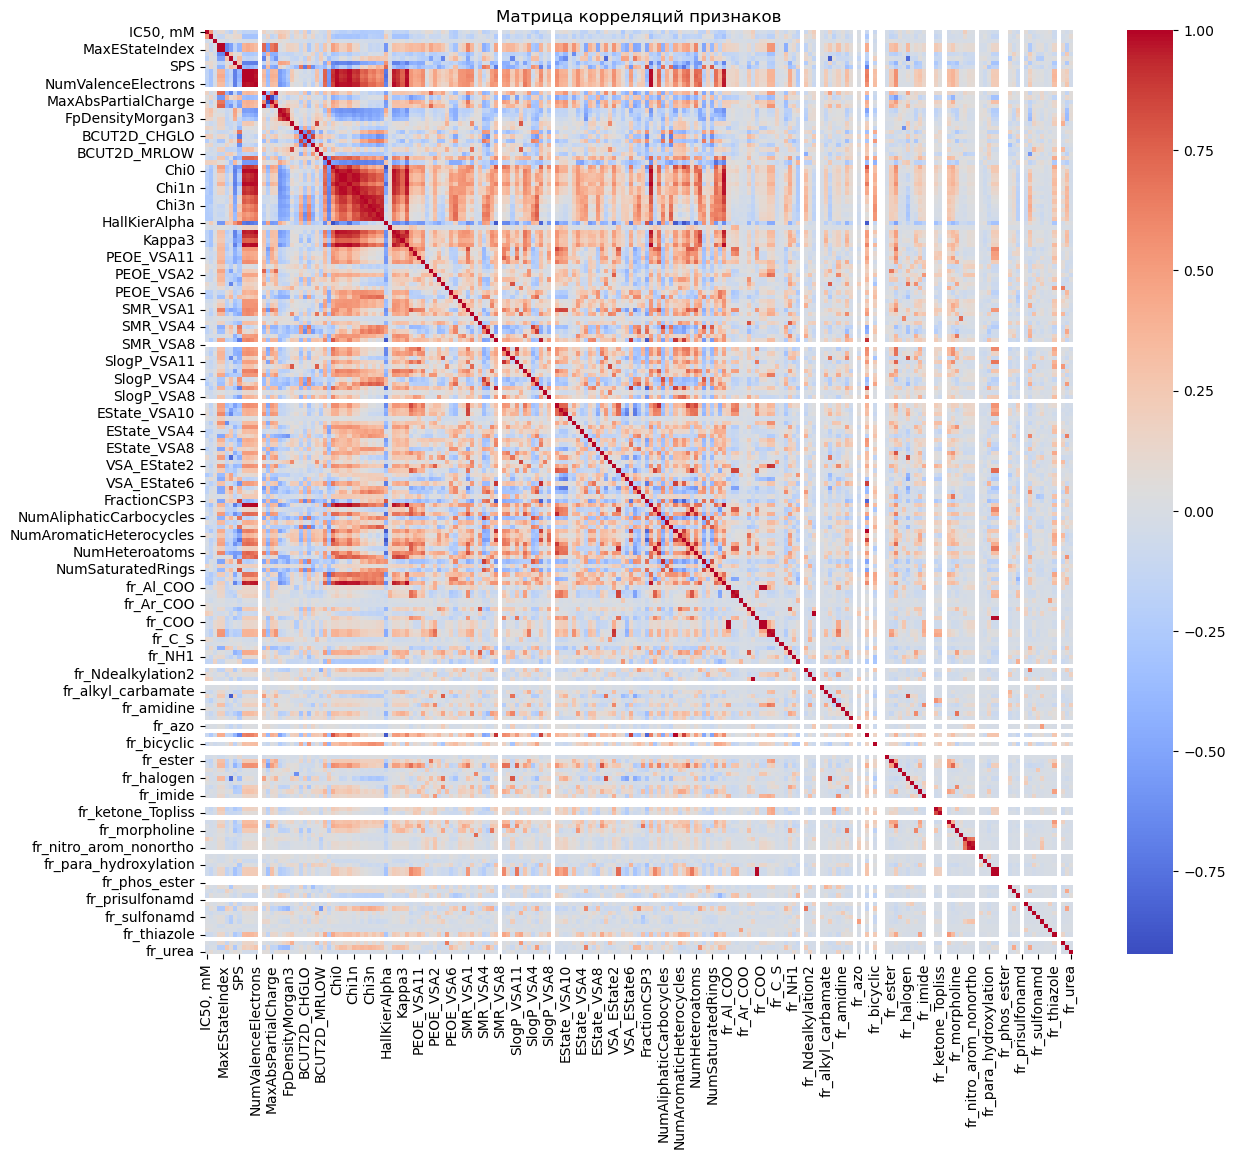

In [471]:
# Вычисление матрицы корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Матрица корреляций признаков")
plt.show()

In [472]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(pair)

print("\nПары признаков с корреляцией > 0.9:")
for pair in high_corr_pairs:
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")


Пары признаков с корреляцией > 0.9:
MaxAbsEStateIndex и MaxEStateIndex: 1.00
MolWt и HeavyAtomMolWt: 1.00
MolWt и ExactMolWt: 1.00
MolWt и NumValenceElectrons: 0.98
MolWt и BertzCT: 0.90
MolWt и Chi0: 0.99
MolWt и Chi0n: 0.94
MolWt и Chi0v: 0.95
MolWt и Chi1: 0.99
MolWt и Chi1n: 0.90
MolWt и Chi1v: 0.93
MolWt и Kappa1: 0.96
MolWt и Kappa2: 0.91
MolWt и LabuteASA: 0.99
MolWt и HeavyAtomCount: 0.99
MolWt и MolMR: 0.96
HeavyAtomMolWt и ExactMolWt: 1.00
HeavyAtomMolWt и NumValenceElectrons: 0.97
HeavyAtomMolWt и BertzCT: 0.92
HeavyAtomMolWt и Chi0: 0.98
HeavyAtomMolWt и Chi0n: 0.91
HeavyAtomMolWt и Chi0v: 0.93
HeavyAtomMolWt и Chi1: 0.98
HeavyAtomMolWt и Kappa1: 0.94
HeavyAtomMolWt и LabuteASA: 0.98
HeavyAtomMolWt и HeavyAtomCount: 0.98
HeavyAtomMolWt и MolMR: 0.94
ExactMolWt и NumValenceElectrons: 0.98
ExactMolWt и BertzCT: 0.90
ExactMolWt и Chi0: 0.99
ExactMolWt и Chi0n: 0.94
ExactMolWt и Chi0v: 0.95
ExactMolWt и Chi1: 0.99
ExactMolWt и Chi1n: 0.91
ExactMolWt и Chi1v: 0.93
ExactMolWt и 

Некоторые признаки обладают сильной прямой и обратной корреляциями. Наблюдается линейная зависимость и мультиколлиенарность. Требуется отбор признаков. Проведём его по трэшхолду 0.9, учитывая влиянеие на целевые переменные

## Выбросы

In [473]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [474]:
# Подсчёт выбросов для всех признаков
outlier_counts = {}
for col in df.columns:
    cnt = detect_outliers(col)
    if cnt > 0:
        outlier_counts[col] = cnt

In [475]:
print("Количество выбросов в каждом признаке:")
for col in df.columns:
    print(f"{col}: {detect_outliers(col)} выбросов")

Количество выбросов в каждом признаке:
IC50, mM: 140 выбросов
CC50, mM: 35 выбросов
SI: 119 выбросов
MaxAbsEStateIndex: 60 выбросов
MaxEStateIndex: 60 выбросов
MinAbsEStateIndex: 21 выбросов
MinEStateIndex: 121 выбросов
qed: 0 выбросов
SPS: 0 выбросов
MolWt: 38 выбросов
HeavyAtomMolWt: 37 выбросов
ExactMolWt: 38 выбросов
NumValenceElectrons: 45 выбросов
NumRadicalElectrons: 0 выбросов
MaxPartialCharge: 0 выбросов
MinPartialCharge: 5 выбросов
MaxAbsPartialCharge: 4 выбросов
MinAbsPartialCharge: 0 выбросов
FpDensityMorgan1: 3 выбросов
FpDensityMorgan2: 31 выбросов
FpDensityMorgan3: 50 выбросов
BCUT2D_MWHI: 39 выбросов
BCUT2D_MWLOW: 11 выбросов
BCUT2D_CHGHI: 28 выбросов
BCUT2D_CHGLO: 3 выбросов
BCUT2D_LOGPHI: 4 выбросов
BCUT2D_LOGPLOW: 37 выбросов
BCUT2D_MRHI: 55 выбросов
BCUT2D_MRLOW: 69 выбросов
AvgIpc: 0 выбросов
BalabanJ: 36 выбросов
BertzCT: 34 выбросов
Chi0: 34 выбросов
Chi0n: 53 выбросов
Chi0v: 62 выбросов
Chi1: 38 выбросов
Chi1n: 46 выбросов
Chi1v: 51 выбросов
Chi2n: 31 выбросов
C

Оставим в выводе только те колонки, в которых есть выбросы

In [476]:
print("\nКоличество выбросов в признаках:")
for key, value in outlier_counts.items():
    print(f"{key}: {value}")


Количество выбросов в признаках:
IC50, mM: 140
CC50, mM: 35
SI: 119
MaxAbsEStateIndex: 60
MaxEStateIndex: 60
MinAbsEStateIndex: 21
MinEStateIndex: 121
MolWt: 38
HeavyAtomMolWt: 37
ExactMolWt: 38
NumValenceElectrons: 45
MinPartialCharge: 5
MaxAbsPartialCharge: 4
FpDensityMorgan1: 3
FpDensityMorgan2: 31
FpDensityMorgan3: 50
BCUT2D_MWHI: 39
BCUT2D_MWLOW: 11
BCUT2D_CHGHI: 28
BCUT2D_CHGLO: 3
BCUT2D_LOGPHI: 4
BCUT2D_LOGPLOW: 37
BCUT2D_MRHI: 55
BCUT2D_MRLOW: 69
BalabanJ: 36
BertzCT: 34
Chi0: 34
Chi0n: 53
Chi0v: 62
Chi1: 38
Chi1n: 46
Chi1v: 51
Chi2n: 31
Chi2v: 24
Chi3n: 51
Chi3v: 40
Chi4n: 50
Chi4v: 55
HallKierAlpha: 2
Ipc: 200
Kappa1: 42
Kappa2: 59
Kappa3: 62
LabuteASA: 47
PEOE_VSA1: 40
PEOE_VSA10: 52
PEOE_VSA11: 120
PEOE_VSA12: 69
PEOE_VSA13: 183
PEOE_VSA14: 10
PEOE_VSA2: 24
PEOE_VSA3: 48
PEOE_VSA4: 197
PEOE_VSA5: 163
PEOE_VSA6: 19
PEOE_VSA7: 42
PEOE_VSA8: 25
PEOE_VSA9: 29
SMR_VSA1: 20
SMR_VSA10: 23
SMR_VSA2: 11
SMR_VSA3: 11
SMR_VSA4: 22
SMR_VSA5: 27
SMR_VSA6: 48
SMR_VSA9: 141
SlogP_VSA1: 8

Как видно, обильно выражены признаки в том числе в целевых переменных:
- IC50: 145
- SI: 124
- CC50: 39

Датасет будет очищен от данных выбросов при выполненни блокнота по обучению моделей для каждой конкретной целевой величины

Визуализируем топ 30 признаков с выбросами

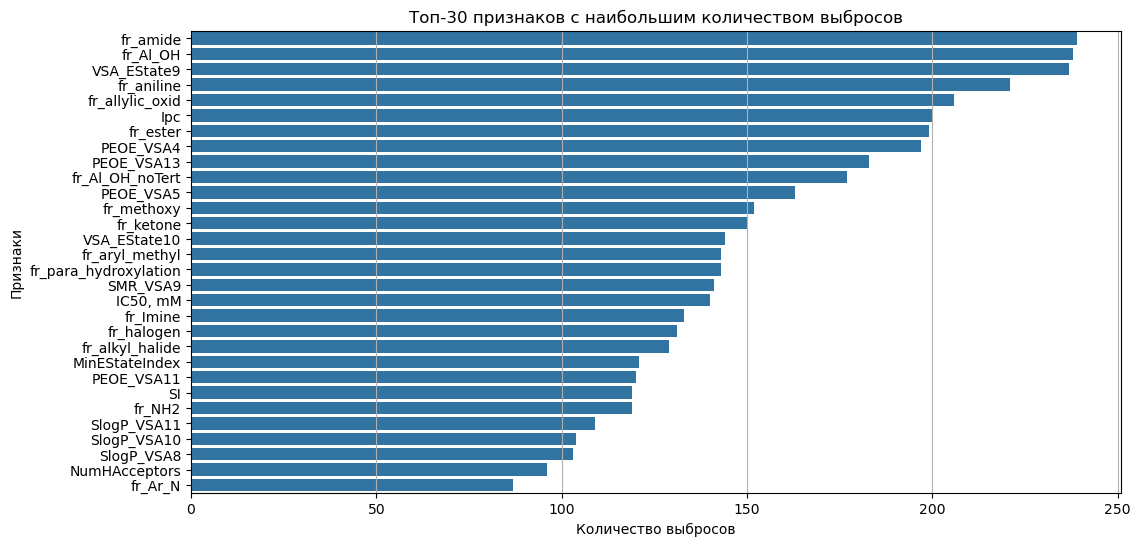

In [477]:
top_outliers = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:30])
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_outliers.values()), y=list(top_outliers.keys()))
plt.title("Топ-30 признаков с наибольшим количеством выбросов")
plt.xlabel("Количество выбросов")
plt.ylabel("Признаки")
plt.grid(axis='x')
plt.show()

# Отбор признаков

In [478]:
low_variance = df.var()[df.var() == 0].index
low_variance

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH',
       'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo',
       'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam',
       'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd',
       'fr_thiocyan'],
      dtype='object')

Признаки с нулевой дисперсией можно безболезненно удалить

In [479]:
df = df.drop(columns=low_variance)

In [480]:
df.shape

(966, 195)

In [481]:
high_corr_features_count = {}
for it in high_corr_pairs:
    high_corr_features_count[it[0]] = high_corr_features_count.get(it[0], 0) + 1
    high_corr_features_count[it[1]] = high_corr_features_count.get(it[1], 0) + 1
    
dict(sorted(list(high_corr_features_count.items()), key=lambda x: x[1], reverse=True))

{'MolWt': 15,
 'ExactMolWt': 15,
 'Chi1': 15,
 'HeavyAtomCount': 15,
 'NumValenceElectrons': 14,
 'Chi0': 14,
 'Chi0n': 14,
 'Chi0v': 14,
 'Chi1n': 14,
 'Chi1v': 14,
 'Kappa1': 14,
 'LabuteASA': 14,
 'MolMR': 14,
 'HeavyAtomMolWt': 12,
 'Kappa2': 10,
 'Chi2n': 8,
 'Chi2v': 7,
 'BertzCT': 6,
 'Chi3n': 5,
 'Chi3v': 5,
 'Chi4v': 5,
 'Chi4n': 4,
 'SMR_VSA7': 4,
 'NOCount': 3,
 'FpDensityMorgan2': 2,
 'SlogP_VSA6': 2,
 'VSA_EState6': 2,
 'NumAromaticCarbocycles': 2,
 'fr_benzene': 2,
 'fr_C_O': 2,
 'NumHDonors': 2,
 'fr_Al_COO': 2,
 'fr_COO': 2,
 'fr_COO2': 2,
 'fr_Ar_OH': 2,
 'fr_phenol': 2,
 'fr_phenol_noOrthoHbond': 2,
 'MaxAbsEStateIndex': 1,
 'MaxEStateIndex': 1,
 'MaxPartialCharge': 1,
 'MinAbsPartialCharge': 1,
 'MinPartialCharge': 1,
 'MaxAbsPartialCharge': 1,
 'FpDensityMorgan1': 1,
 'FpDensityMorgan3': 1,
 'HallKierAlpha': 1,
 'Kappa3': 1,
 'SMR_VSA9': 1,
 'SlogP_VSA11': 1,
 'TPSA': 1,
 'VSA_EState2': 1,
 'VSA_EState3': 1,
 'NHOHCount': 1,
 'NumHAcceptors': 1,
 'NumHeteroatoms': 1

In [482]:
cols_to_drop = set()
for col1, col2, value in high_corr_pairs:
    if col2 in df:
        cols_to_drop.add(col2)

df = df.drop(cols_to_drop, axis=1)

In [483]:
df.shape

(966, 148)

# Нормаллизация и сохранение данных

In [484]:
from sklearn.preprocessing import StandardScaler

In [485]:
features = df.columns[3:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_features, columns=features)
df_scaled[targets] = df[targets].values

In [486]:

df_scaled.head()

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000


In [487]:
df_scaled.to_parquet("data/processed_data_full.parquet")